# Df 0 1 5_ Lazy Data Source
This tutorial illustrates how to take advantage of a *lazy data source*
creating a data frame from columns of one or multiple parent dataframe(s),
delaying the creation of the columns to the actual usage of the daughter
data frame.
Dataset Reference:
McCauley, T. (2014). Dimuon event information derived from the Run2010B
public Mu dataset. CERN Open Data Portal.
DOI: [10.7483/OPENDATA.CMS.CB8H.MFFA](http://opendata.cern.ch/record/700).
From the ROOT website: https://root.cern.ch/files/tutorials/tdf014_CsvDataSource_MuRun2010B.csv




**Author:** Danilo Piparo  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:06 AM.</small></i>

In [1]:
using namespace ROOT::RDF;

Let's first create a rdf that will read from the csv file.
 See the tutorial relative to CSV data sources for more details!

In [2]:
auto fileNameUrl = "http://root.cern.ch/files/tutorials/df014_CsvDataSource_MuRun2010B.csv";
auto fileName = "df015_CsvDataSource_MuRun2010B.csv";
TFile::Cp(fileNameUrl, fileName);

auto csv_rdf = MakeCsvDataFrame(fileName);

[TFile::Cp] Total 14.46 MB	|====================| 100.00 % [88.8 MB/s]


Now we take out four columns: px and py of the first muon in the muon pair

In [3]:
std::string px1Name = "px1";
auto px1 = csv_rdf.Take<double>(px1Name);
std::string py1Name = "py1";
auto py1 = csv_rdf.Take<double>(py1Name);

Now we create a new dataframe built on top of the columns above. note that up to now, no event loop
 has been carried out!

In [4]:
auto tdf = MakeLazyDataFrame(std::make_pair(px1Name, px1), std::make_pair(py1Name, py1));

We build a histogram of the transverse momentum the muons.

In [5]:
auto ptFormula = [](double px, double py) { return sqrt(px * px + py * py); };
auto pt_h = tdf.Define("pt", ptFormula, {"px1", "py1"})
               .Histo1D<double>({"pt", "Muon p_{T};p_{T} [GeV/c];", 128, 0, 128}, "pt");

auto can = new TCanvas();
can->SetLogy();
pt_h->DrawCopy();

return 0;

Draw all canvases 

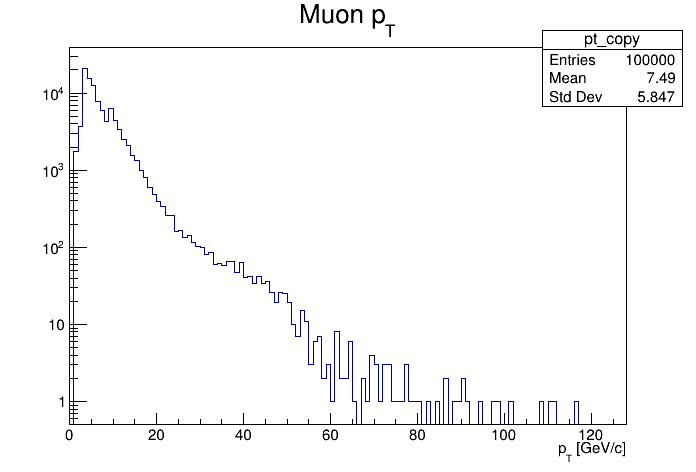

In [6]:
gROOT->GetListOfCanvases()->Draw()